In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.spatial.distance import cityblock
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

In [2]:
songs_10 = pd.read_csv("audio_features_10.csv")

In [3]:
songs_10.drop(columns = ["id", "html"], inplace = True)

In [4]:
songs_10

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4
1,The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4
7,In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4


In [5]:
# manual way of calculating Manhanttan distance between the first two songs
manh_dist = 0
for i in range(2, len(songs_10.columns)):
    manh_dist += abs(songs_10.iloc[0, i] - songs_10.iloc[1, i])
manh_dist

14594.30400205

In [6]:
cityblock(songs_10.iloc[0, 2:], songs_10.iloc[1, 2:])

14594.30400205

In [7]:
manhattan_dist = pd.DataFrame(pairwise_distances(songs_10.iloc[0:, 2:], metric = "manhattan"), 
                              index = songs_10["song_name"], columns = songs_10["song_name"])
manhattan_dist

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,14594.304002,86413.021202,19246.512458,96552.976938,49891.798398,139972.860258,94986.836618,189068.864568,30432.332298
The Real Slim Shady,14594.304002,0.000000,71855.037200,33830.477260,81998.387540,64475.348000,154558.094660,109578.247820,174479.807370,15843.291100
Águas De Março,86413.021202,71855.037200,0.000000,105607.805660,10158.412540,136238.385600,226339.745060,181363.645820,102702.765770,56120.247500
The Girl From Ipanema,19246.512458,33830.477260,105607.805660,0.000000,115766.118080,30667.985940,120748.435400,75768.840160,208278.985910,49642.441840
"Paint It, Black",96552.976938,81998.387540,10158.412540,115766.118080,0.000000,146373.039260,236486.407320,191508.453280,92594.722630,66278.190360
Sultans Of Swing,49891.798398,64475.348000,136238.385600,30667.985940,146373.039260,0.000000,90116.154060,45144.092220,238940.901770,80304.338500
Space Raiders - Charlotte de Witte Remix,139972.860258,154558.094660,226339.745060,120748.435400,236486.407320,90116.154060,0.000000,44988.511840,329017.852830,170380.500560
In Silence,94986.836618,109578.247820,181363.645820,75768.840160,191508.453280,45144.092220,44988.511840,0.000000,284033.665390,125396.470720
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",189068.864568,174479.807370,102702.765770,208278.985910,92594.722630,238940.901770,329017.852830,284033.665390,0.000000,158637.573270


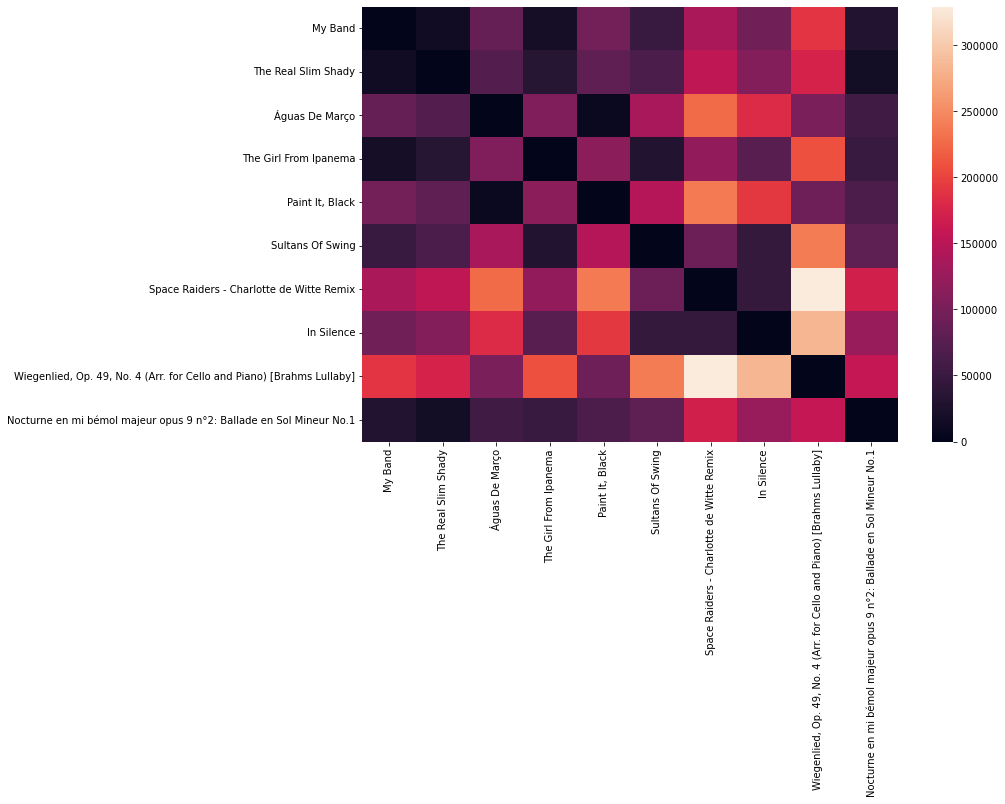

In [8]:
plt.subplots(figsize = (12, 8))
sns.heatmap(manhattan_dist)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [9]:
euclidean_dist = pd.DataFrame(pairwise_distances(songs_10.iloc[0:, 2:]), index = songs_10["song_name"], 
                              columns = songs_10["song_name"])
euclidean_dist

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,14573.008837,86373.004053,19214.008255,96506.007937,49851.008569,139947.000755,94967.000742,188973.011468,30346.064036
The Real Slim Shady,14573.008837,0.000000,71800.011470,33787.011607,81933.018179,64424.015069,154520.002598,109540.002881,174400.007771,15773.072153
Águas De Março,86373.004053,71800.011470,0.000000,105587.001068,10133.013675,136224.000212,226320.000342,181340.000704,102600.034257,56027.060661
The Girl From Ipanema,19214.008255,33787.011607,105587.001068,0.000000,115720.004190,30637.006720,120733.000250,75753.000499,208187.011767,49560.047303
"Paint It, Black",96506.007937,81933.018179,10133.013675,115720.004190,0.000000,146357.000435,236453.001534,191473.002481,92467.054250,66160.073247
Sultans Of Swing,49851.008569,64424.015069,136224.000212,30637.006720,146357.000435,0.000000,90096.001470,45116.004743,238824.016883,80197.048230
Space Raiders - Charlotte de Witte Remix,139947.000755,154520.002598,226320.000342,120733.000250,236453.001534,90096.001470,0.000000,44980.000292,328920.008331,170293.015164
In Silence,94967.000742,109540.002881,181340.000704,75753.000499,191473.002481,45116.004743,44980.000292,0.000000,283940.008605,125313.018317
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",188973.011468,174400.007771,102600.034257,208187.011767,92467.054250,238824.016883,328920.008331,283940.008605,0.000000,158627.000248


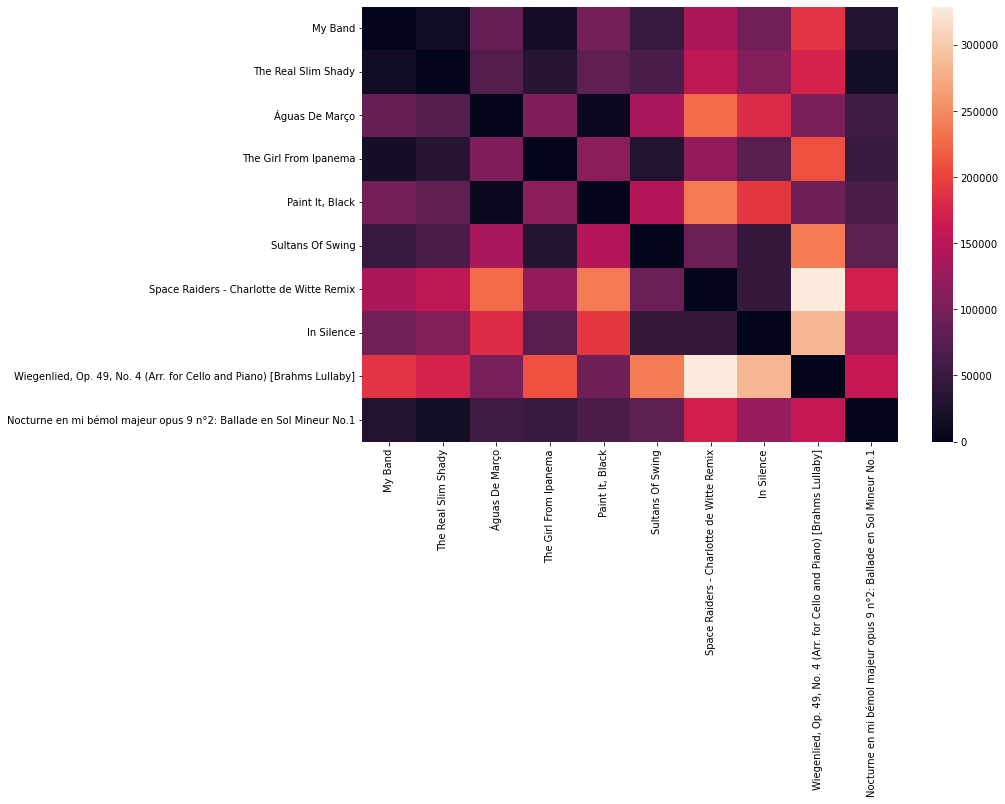

In [10]:
plt.subplots(figsize = (12, 8))
sns.heatmap(euclidean_dist)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [11]:
songs_scaled = MinMaxScaler().fit_transform(songs_10.iloc[:, 2:])
songs_norm = pd.DataFrame(songs_scaled, columns = songs_10.columns[2:])
songs_norm

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
1,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
2,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
3,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
4,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0
5,0.717647,0.934576,0.571429,0.779548,1.0,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085,1.0
6,0.738562,0.859636,0.428571,0.751594,1.0,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000,1.0
7,0.721569,0.995242,0.000000,0.713347,1.0,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249,1.0
8,0.000000,0.000000,0.285714,0.000000,1.0,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000,0.0
9,0.265359,0.043739,0.285714,0.292331,1.0,0.052150,1.000000,1.000000,0.188348,0.012856,0.000000,0.482266,1.0


In [12]:
songs_norm.insert(0, "song_name", songs_10["song_name"])

In [13]:
songs_norm.insert(1, "artist", songs_10["artist"])

In [14]:
songs_norm

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,My Band,D12,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
1,The Real Slim Shady,Eminem,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
2,Águas De Março,Antônio Carlos Jobim,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
3,The Girl From Ipanema,Stan Getz,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
4,"Paint It, Black",The Rolling Stones,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0
5,Sultans Of Swing,Dire Straits,0.717647,0.934576,0.571429,0.779548,1.0,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085,1.0
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.738562,0.859636,0.428571,0.751594,1.0,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000,1.0
7,In Silence,Amelie Lens,0.721569,0.995242,0.000000,0.713347,1.0,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249,1.0
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.000000,0.000000,0.285714,0.000000,1.0,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000,0.0
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.265359,0.043739,0.285714,0.292331,1.0,0.052150,1.000000,1.000000,0.188348,0.012856,0.000000,0.482266,1.0


In [15]:
manhattan_dist_norm = pd.DataFrame(pairwise_distances(songs_norm.iloc[:, 2:], metric = "manhattan"), 
                              index = songs_10["song_name"], columns = songs_10["song_name"])
manhattan_dist_norm

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,2.158943,4.392734,5.049142,4.069427,4.116163,5.094322,4.465909,8.528299,7.073192
The Real Slim Shady,2.158943,0.000000,5.132145,4.837304,4.853959,3.592995,4.891073,4.922580,8.474476,7.064619
Águas De Março,4.392734,5.132145,0.000000,2.518397,3.677891,4.575643,4.325075,4.971998,5.663808,4.588967
The Girl From Ipanema,5.049142,4.837304,2.518397,0.000000,5.322699,4.028828,4.855091,4.470023,5.452053,3.800492
"Paint It, Black",4.069427,4.853959,3.677891,5.322699,0.000000,2.679931,4.506753,4.224689,7.942043,6.889223
Sultans Of Swing,4.116163,3.592995,4.575643,4.028828,2.679931,0.000000,4.002044,3.574927,8.546980,6.808250
Space Raiders - Charlotte de Witte Remix,5.094322,4.891073,4.325075,4.855091,4.506753,4.002044,0.000000,1.638625,7.219954,4.855460
In Silence,4.465909,4.922580,4.971998,4.470023,4.224689,3.574927,1.638625,0.000000,6.758284,4.351028
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",8.528299,8.474476,5.663808,5.452053,7.942043,8.546980,7.219954,6.758284,0.000000,2.757533


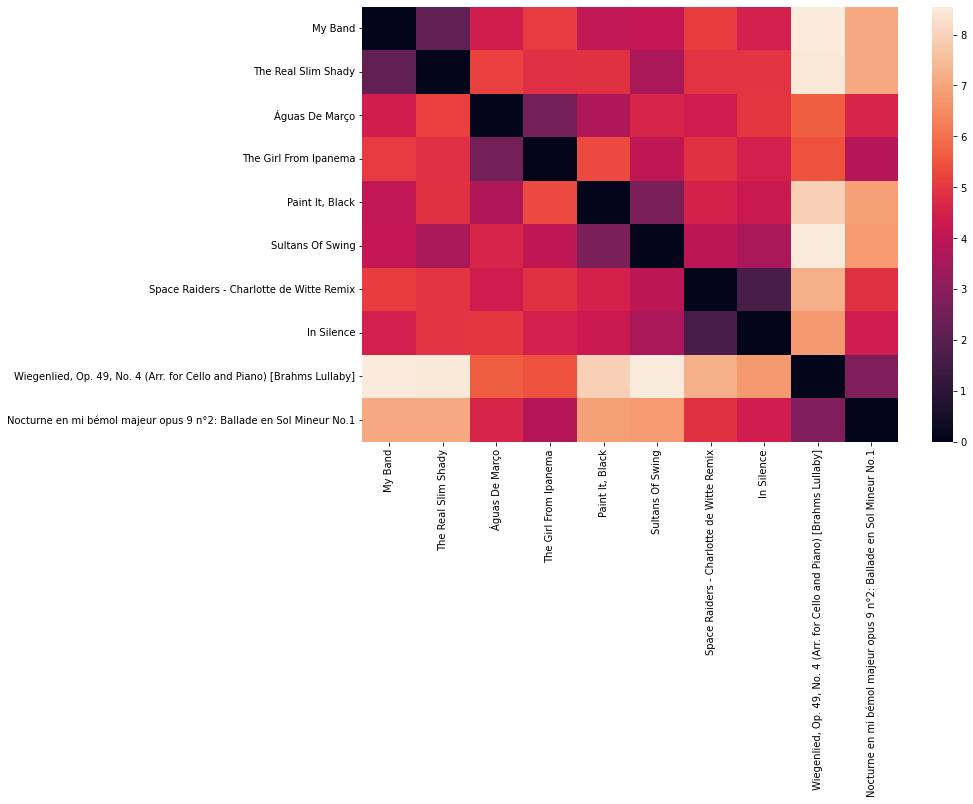

In [16]:
plt.subplots(figsize = (12, 8))
sns.heatmap(manhattan_dist_norm)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [17]:
euclidean_dist_norm = pd.DataFrame(pairwise_distances(songs_norm.iloc[:, 2:]), index = songs_10["song_name"], 
                              columns = songs_10["song_name"])
euclidean_dist_norm

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,0.865424,1.543712,1.890353e+00,1.570970,1.519874,1.869464,1.771203,2.611037,2.335151
The Real Slim Shady,0.865424,0.000000,1.769612,1.713638e+00,1.813472,1.459289,1.801010,1.773372,2.627079,2.336751
Águas De Março,1.543712,1.769612,0.000000,1.249081e+00,1.435993,1.703637,1.656648,1.871919,1.968514,1.793372
The Girl From Ipanema,1.890353,1.713638,1.249081,4.214685e-08,1.903296,1.538547,1.794488,1.891412,1.892255,1.535254
"Paint It, Black",1.570970,1.813472,1.435993,1.903296e+00,0.000000,1.074686,1.705039,1.639784,2.488509,2.324324
Sultans Of Swing,1.519874,1.459289,1.703637,1.538547e+00,1.074686,0.000000,1.686493,1.546424,2.605251,2.309939
Space Raiders - Charlotte de Witte Remix,1.869464,1.801010,1.656648,1.794488e+00,1.705039,1.686493,0.000000,0.815132,2.403171,1.829474
In Silence,1.771203,1.773372,1.871919,1.891412e+00,1.639784,1.546424,0.815132,0.000000,2.331705,1.732820
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2.611037,2.627079,1.968514,1.892255e+00,2.488509,2.605251,2.403171,2.331705,0.000000,1.247945


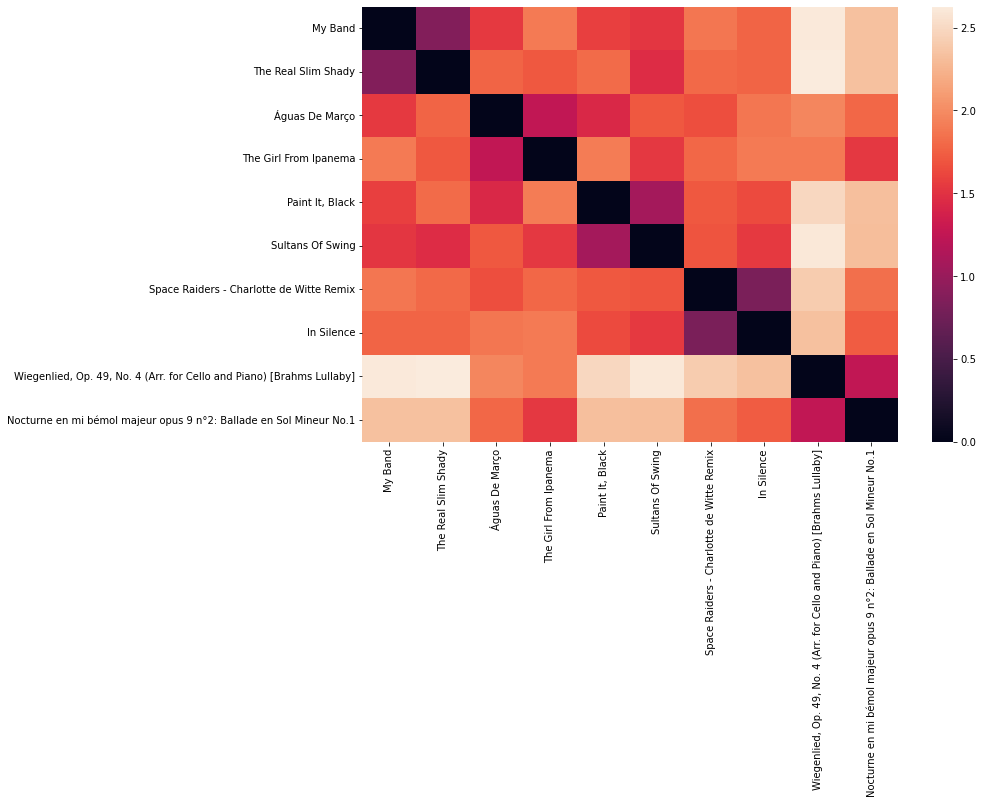

In [22]:
plt.subplots(figsize = (12, 8))
sns.heatmap(euclidean_dist_norm)
plt.xlabel(None)
plt.ylabel(None)
plt.show()